In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
brewing_materials = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewing_materials.csv')
beer_taxed = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_taxed.csv')
brewer_size = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewer_size.csv')
beer_states = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')

In [7]:
brewing_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_type         1440 non-null   object 
 1   material_type     1440 non-null   object 
 2   year              1440 non-null   int64  
 3   month             1440 non-null   int64  
 4   type              1440 non-null   object 
 5   month_current     1440 non-null   int64  
 6   month_prior_year  1440 non-null   int64  
 7   ytd_current       1008 non-null   float64
 8   ytd_prior_year    1008 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 101.4+ KB


In [8]:
brewing_materials.head()

,data_type,material_type,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year
0,Pounds of Materials Used,Grain Products,2008,1,Malt and malt products,374165152,365300134,374165152.0,365300134.0
1,Pounds of Materials Used,Grain Products,2008,1,Corn and corn products,57563519,41647092,57563519.0,41647092.0
2,Pounds of Materials Used,Grain Products,2008,1,Rice and rice products,72402143,81050102,72402143.0,81050102.0
3,Pounds of Materials Used,Grain Products,2008,1,Barley and barley products,3800844,2362162,3800844.0,2362162.0
4,Pounds of Materials Used,Grain Products,2008,1,Wheat and wheat products,1177186,1195381,1177186.0,1195381.0


In [18]:
# set categorical data
brewing_materials['type'] = brewing_materials['type'].astype('category')
brewing_materials['data_type'] = brewing_materials['data_type'].astype('category')
brewing_materials['material_type'] = brewing_materials['material_type'].astype('category')

In [8]:
def top5(df):
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
def categorical_eda(df, hue=None):
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

data_type         1
material_type     5
type             12
dtype: int64
Top 5 unique values of data_type
                  data_type  Count
0  Pounds of Materials Used   1440
 
Top 5 unique values of material_type
              material_type  Count
0            Grain Products    600
1        Non-Grain Products    480
2                Total Used    120
3  Total Non-Grain products    120
4      Total Grain products    120
 
Top 5 unique values of type
                       type  Count
0  Wheat and wheat products    120
1                Total Used    120
2  Total Non-Grain products    120
3      Total Grain products    120
4          Sugar and syrups    120
 


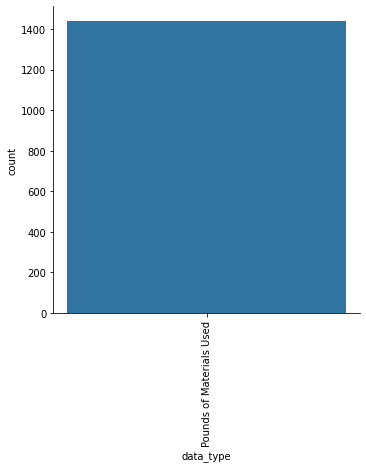

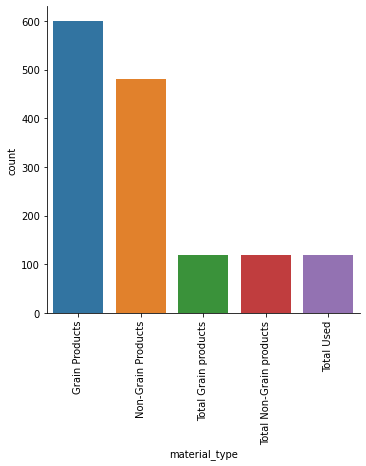

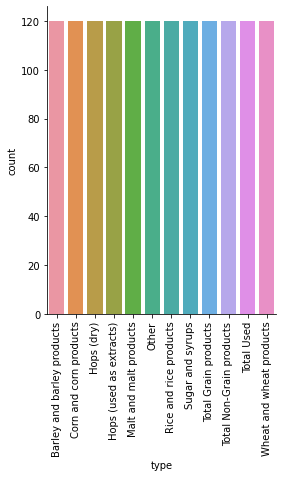

In [9]:
categorical_eda(brewing_materials)

In [13]:
brewing_materials['type'].unique()

array(['Malt and malt products', 'Corn and corn products',
       'Rice and rice products', 'Barley and barley products',
       'Wheat and wheat products', 'Total Grain products',
       'Sugar and syrups', 'Hops (dry)', 'Hops (used as extracts)',
       'Other', 'Total Non-Grain products', 'Total Used'], dtype=object)

In [14]:
brewing_materials['material_type'].unique()

array(['Grain Products', 'Total Grain products', 'Non-Grain Products',
       'Total Non-Grain products', 'Total Used'], dtype=object)

In [17]:
brewing_materials[brewing_materials['year'] == 2015].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1008 to 1151
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_type         144 non-null    object 
 1   material_type     144 non-null    object 
 2   year              144 non-null    int64  
 3   month             144 non-null    int64  
 4   type              144 non-null    object 
 5   month_current     144 non-null    int64  
 6   month_prior_year  144 non-null    int64  
 7   ytd_current       0 non-null      float64
 8   ytd_prior_year    0 non-null      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 11.2+ KB


In [21]:
indexNames = brewing_materials[ brewing_materials['type'] == "Grain Products" ].index
brewing_materials.drop(indexNames , inplace=True)

indexNames = brewing_materials[ brewing_materials['type'] == "Non-Grain Products" ].index
brewing_materials.drop(indexNames , inplace=True)

In [10]:
def numeric_eda(df, hue=None):
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

,count,mean,std,min,25%,50%,75%,max
month_current,1440.0,1.115823e+08,1.790831e+08,0.0,1682829.00,13820963.5,8.451318e+07,6.565965e+08
month_prior_year,1440.0,1.908309e+08,5.298138e+08,0.0,2396199.50,46866388.5,1.145321e+08,6.395439e+09
ytd_current,1008.0,9.285083e+08,1.524014e+09,271405.0,28366420.25,234585887.5,8.431437e+08,7.046705e+09
ytd_prior_year,1008.0,9.416776e+08,1.549125e+09,271405.0,25727495.00,234586142.0,8.498092e+08,7.143917e+09


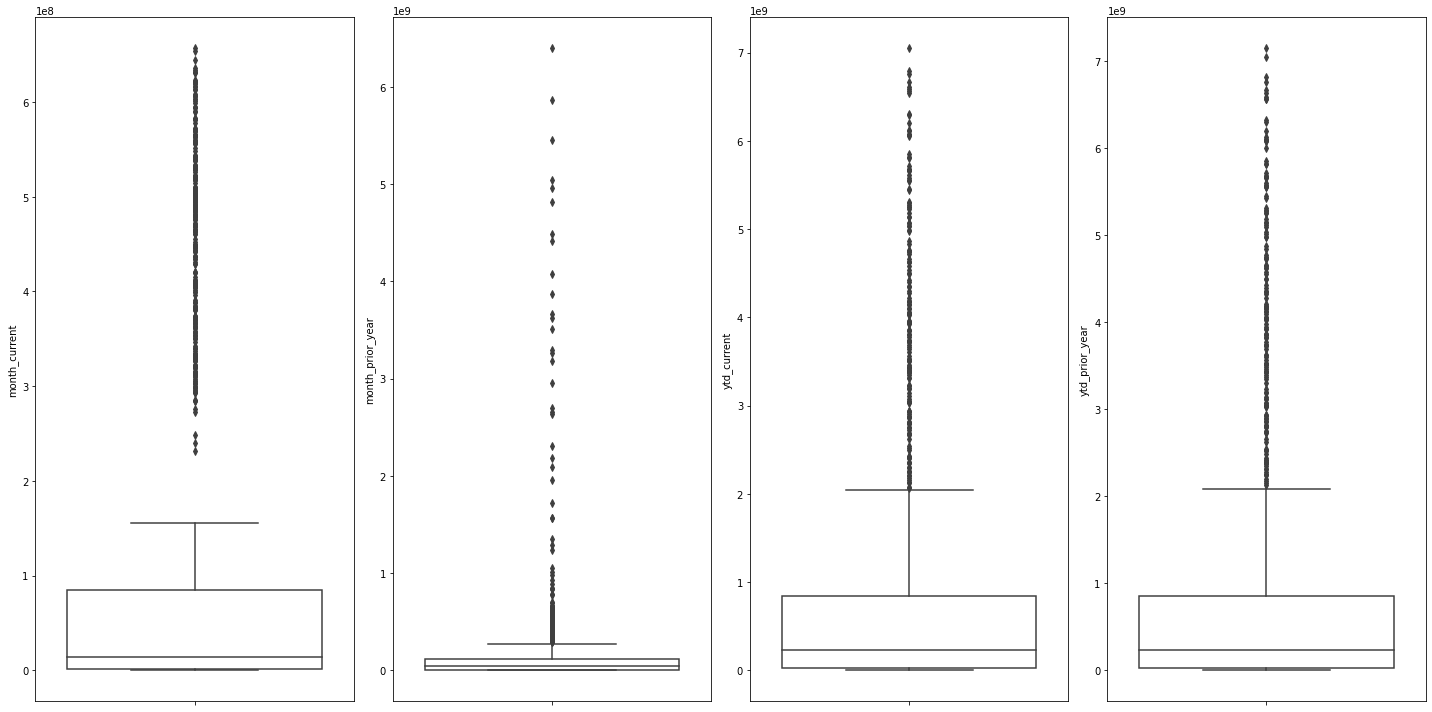

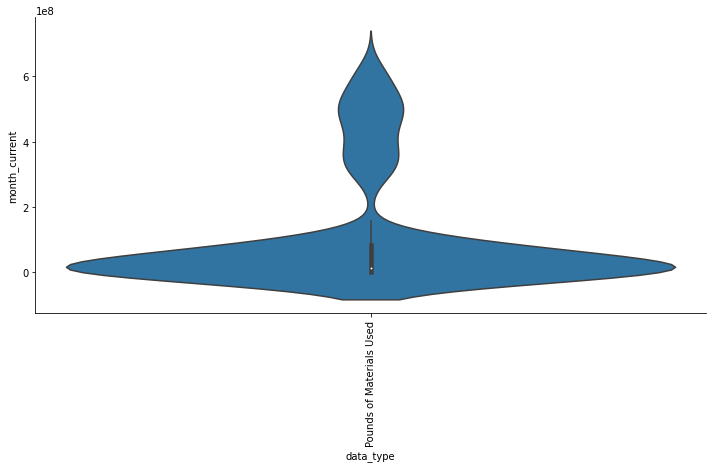

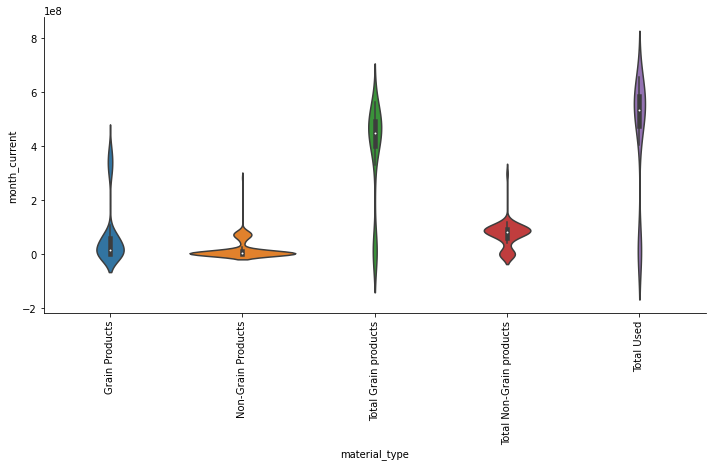

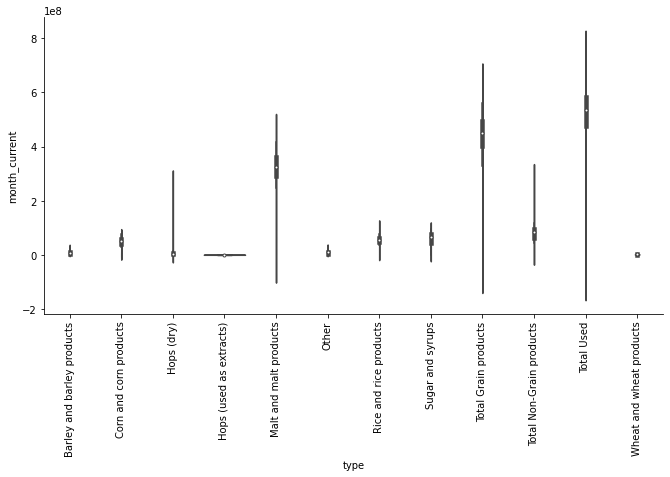

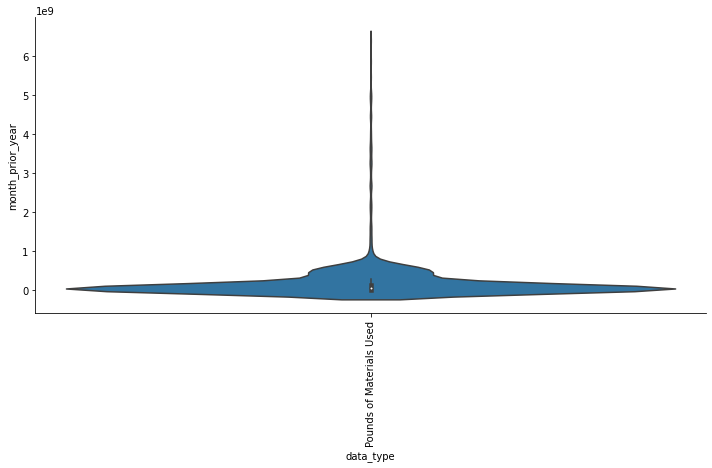

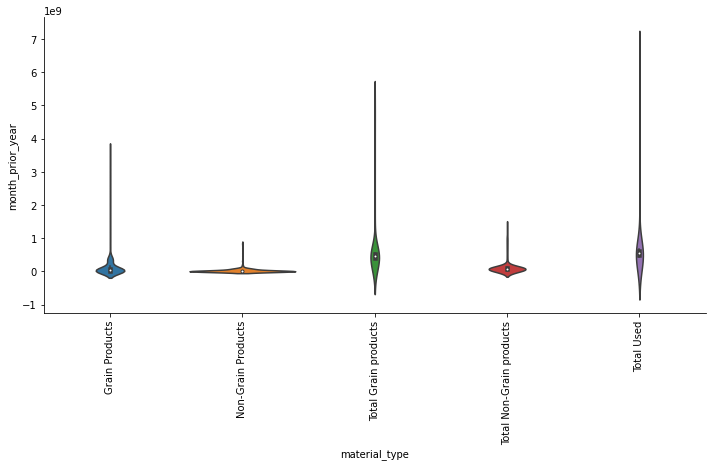

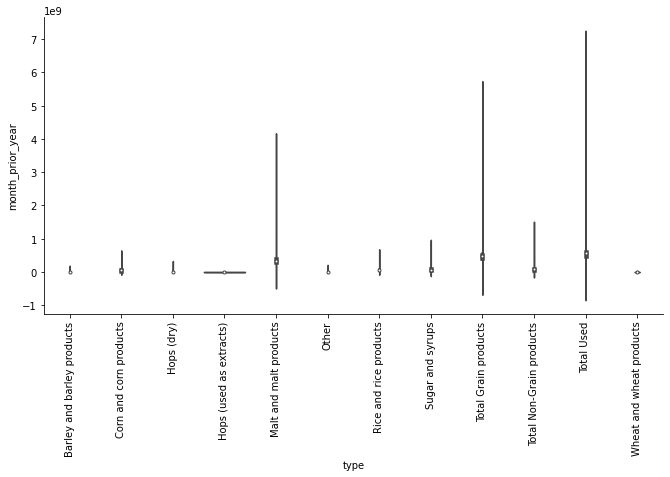

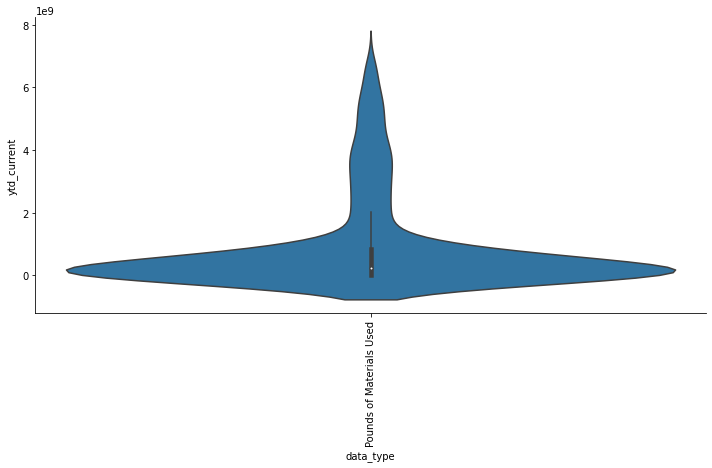

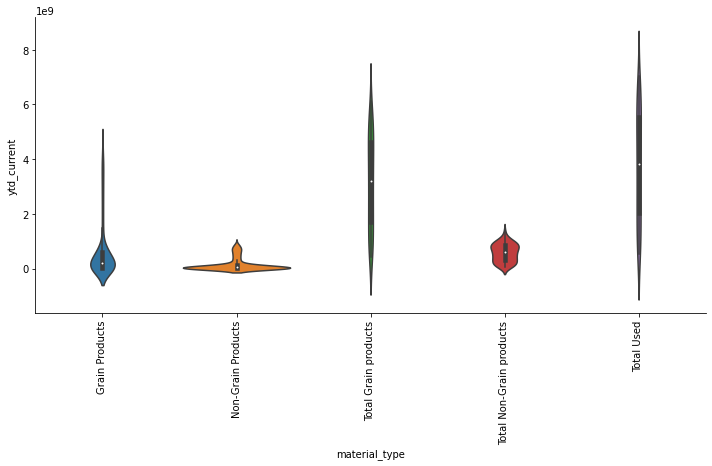

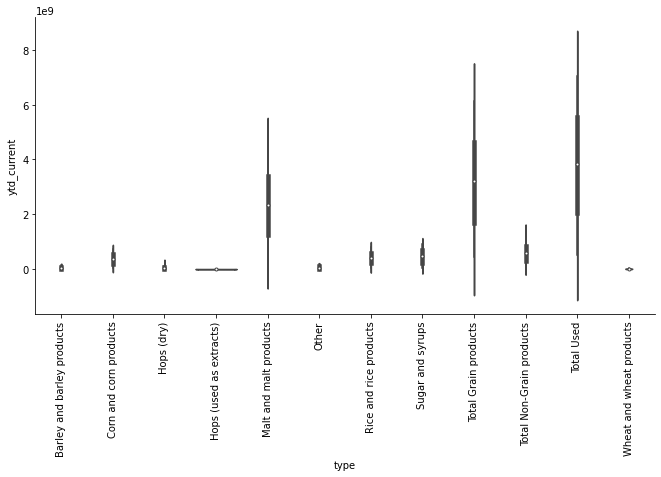

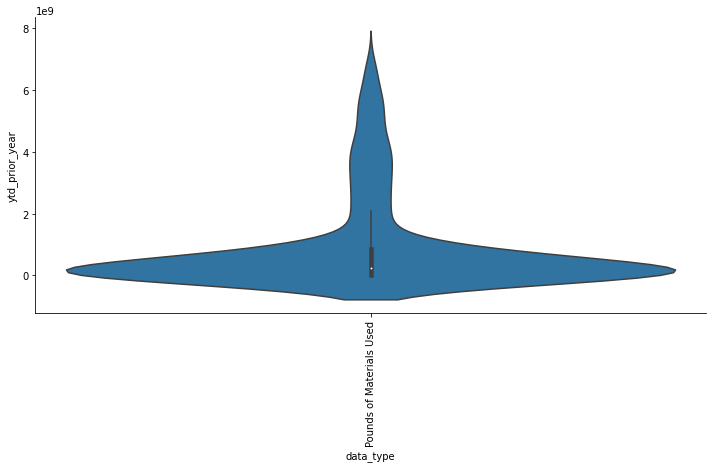

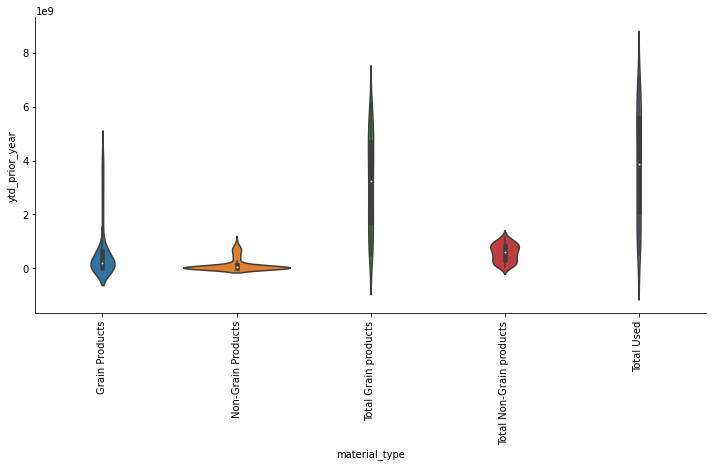

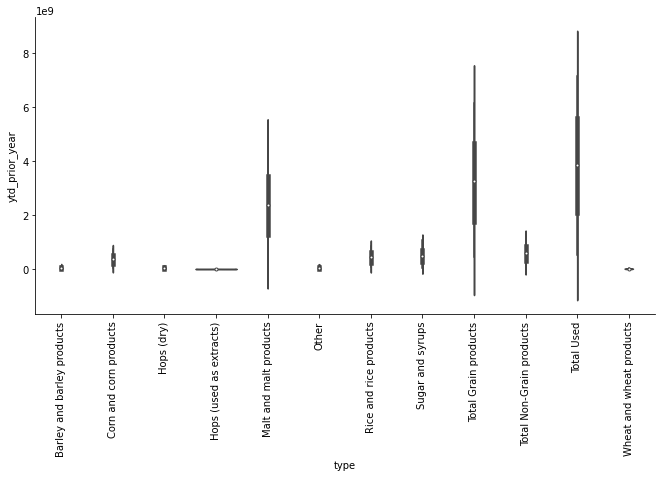

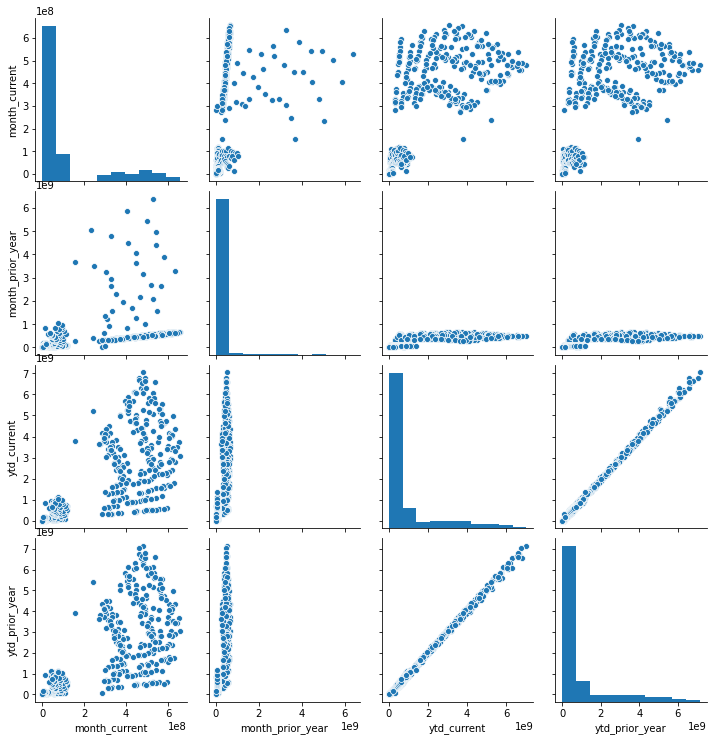

In [12]:
# I do not want to see numerical stats for time
brewing_materials = brewing_materials.drop(columns=["year", "month"])
numeric_eda(brewing_materials)

In [3]:
beer_taxed.head()

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,16211480.0,15880125.0,$7/$18 per barrel
1,Barrels Produced,Taxable,2008,1,In bottles and cans,13222104,12824278,13222104.0,12824278.0,$7/$18 per barrel
2,Barrels Produced,Taxable,2008,1,In barrels and kegs,1371239,1357372,1371239.0,1357372.0,$7/$18 per barrel
3,Barrels Produced,Taxable,2008,1,"Tax Determined, Premises Use",7426,8419,7426.0,8419.0,$7/$18 per barrel
4,Barrels Produced,Sub Total Taxable,2008,1,Sub Total Taxable,14600769,14190069,14600769.0,14190069.0,$7/$18 per barrel


In [4]:
beer_taxed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_type         1580 non-null   object 
 1   tax_status        1580 non-null   object 
 2   year              1580 non-null   int64  
 3   month             1580 non-null   int64  
 4   type              1580 non-null   object 
 5   month_current     1580 non-null   int64  
 6   month_prior_year  1580 non-null   int64  
 7   ytd_current       1556 non-null   float64
 8   ytd_prior_year    1556 non-null   float64
 9   tax_rate          1580 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 123.6+ KB


In [5]:
beer_taxed['tax_status'].unique()

array(['Totals', 'Taxable', 'Sub Total Taxable', 'Tax Free',
       'Sub Total Tax-Free'], dtype=object)

In [6]:
beer_taxed['type'].unique()

array(['Production', 'In bottles and cans', 'In barrels and kegs',
       'Tax Determined, Premises Use', 'Sub Total Taxable', 'For export',
       'For vessels and aircraft', 'Consumed on brewery premises',
       'Sub Total Tax-Free', 'Total Removals',
       'Stocks On Hand end-of-month:', 'In kegs'], dtype=object)

In [6]:
beer_taxed[beer_taxed['tax_status'] == 'Taxable']

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate
1,Barrels Produced,Taxable,2008,1,In bottles and cans,13222104,12824278,13222104.0,12824278.0,$7/$18 per barrel
2,Barrels Produced,Taxable,2008,1,In barrels and kegs,1371239,1357372,1371239.0,1357372.0,$7/$18 per barrel
3,Barrels Produced,Taxable,2008,1,"Tax Determined, Premises Use",7426,8419,7426.0,8419.0,$7/$18 per barrel
12,Barrels Produced,Taxable,2008,2,In bottles and cans,13051864,12209114,26279336.0,25033392.0,$7/$18 per barrel
13,Barrels Produced,Taxable,2008,2,In barrels and kegs,1250974,1197553,2622225.0,2554925.0,$7/$18 per barrel
...,...,...,...,...,...,...,...,...,...,...
1560,Barrels Produced,Taxable,2019,11,In barrels and kegs,1038243,1096527,13511439.0,14461626.0,$3.50/$16 per barrel
1561,Barrels Produced,Taxable,2019,11,"Tax Determined, Premises Use",2622,5286,2687814.0,2437520.0,$3.50/$16 per barrel
1570,Barrels Produced,Taxable,2019,12,In bottles and cans,11669254,11007154,148590626.0,148176859.0,$3.50/$16 per barrel
1571,Barrels Produced,Taxable,2019,12,In barrels and kegs,1253497,1271402,14880067.0,15739092.0,$3.50/$16 per barrel


In [24]:
# set categorical data
beer_taxed['type'] = beer_taxed['type'].astype('category')
beer_taxed['data_type'] = beer_taxed['data_type'].astype('category')
beer_taxed['tax_status'] = beer_taxed['tax_status'].astype('category')

data_type      1
tax_status     5
type          12
tax_rate       2
dtype: int64
Top 5 unique values of data_type
          data_type  Count
0  Barrels Produced   1580
 
Top 5 unique values of tax_status
           tax_status  Count
0              Totals    432
1             Taxable    432
2            Tax Free    428
3   Sub Total Taxable    144
4  Sub Total Tax-Free    144
 
Top 5 unique values of type
                           type  Count
0                Total Removals    144
1  Tax Determined, Premises Use    144
2             Sub Total Taxable    144
3            Sub Total Tax-Free    144
4  Stocks On Hand end-of-month:    144
 
Top 5 unique values of tax_rate
               tax_rate  Count
0     $7/$18 per barrel   1320
1  $3.50/$16 per barrel    260
 


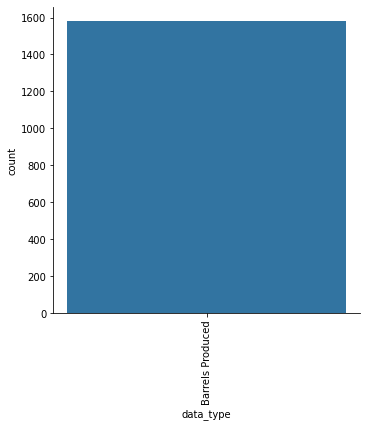

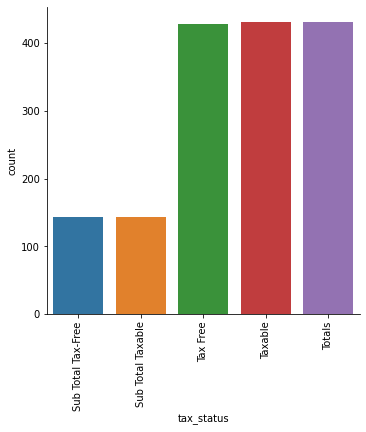

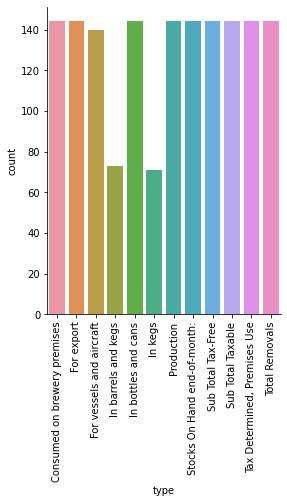

In [25]:
categorical_eda(beer_taxed)

,count,mean,std,min,25%,50%,75%,max
month_current,1580.0,6.544098e+06,6.904094e+06,0.0,111379.75,1420095.5,13745838.75,19131217.0
month_prior_year,1580.0,6.597077e+06,6.964635e+06,0.0,113821.00,1454573.0,13826875.00,18667697.0
ytd_current,1556.0,4.239495e+07,5.628722e+07,0.0,417666.75,8321667.0,79415265.25,199466287.0
ytd_prior_year,1556.0,4.280414e+07,5.684013e+07,0.0,381690.00,8489038.0,79866082.00,199618070.0


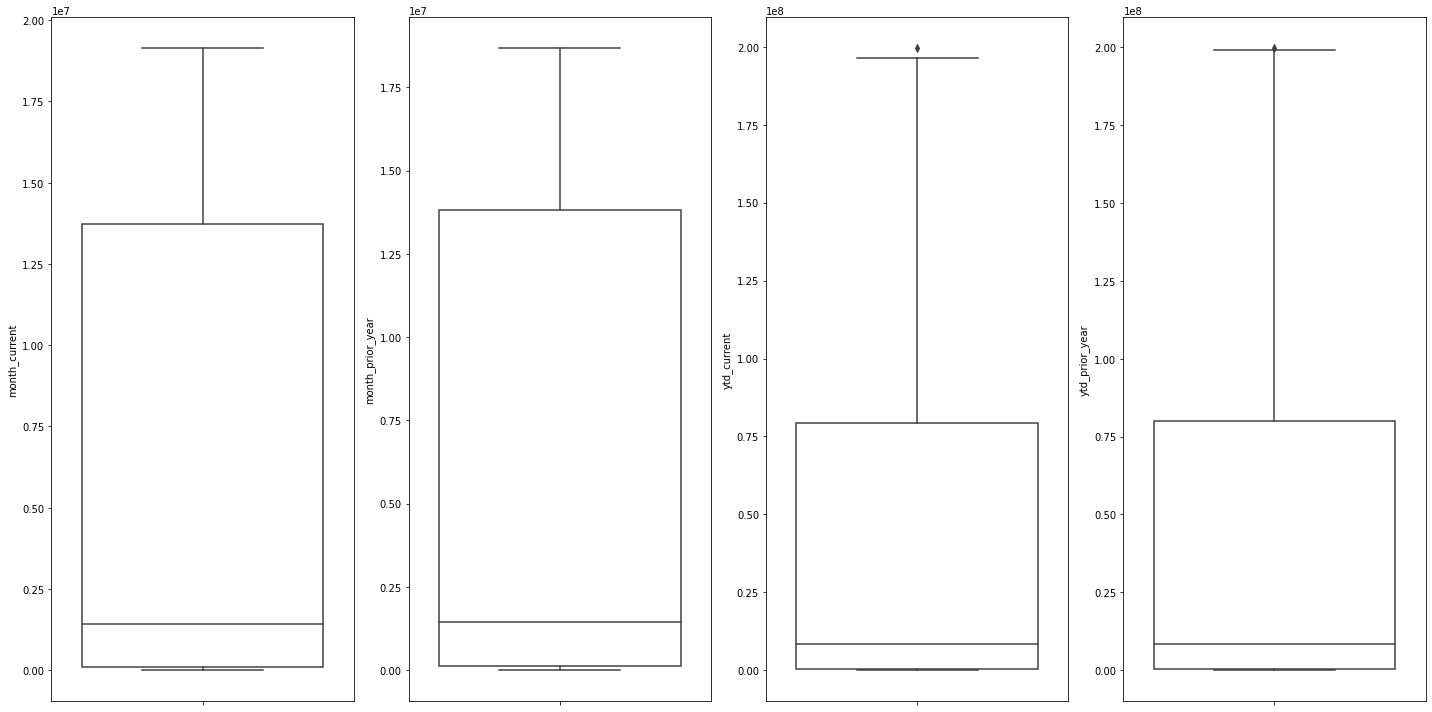

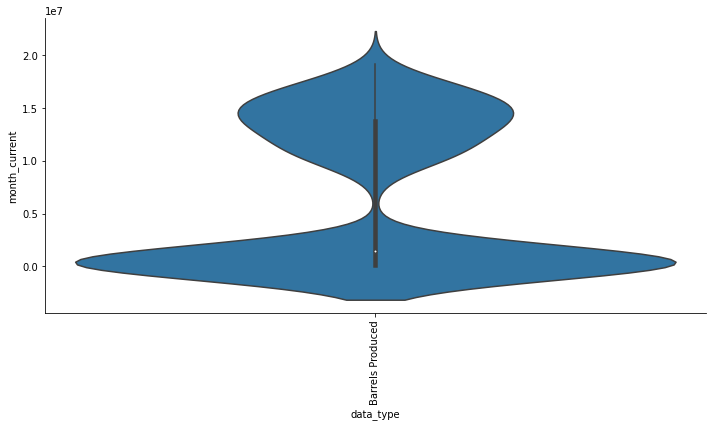

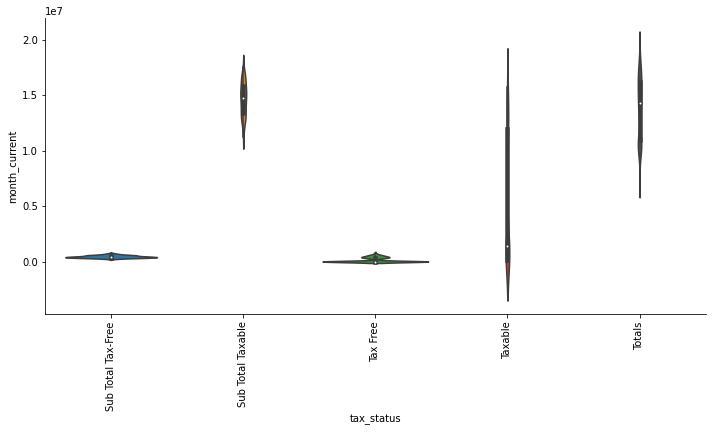

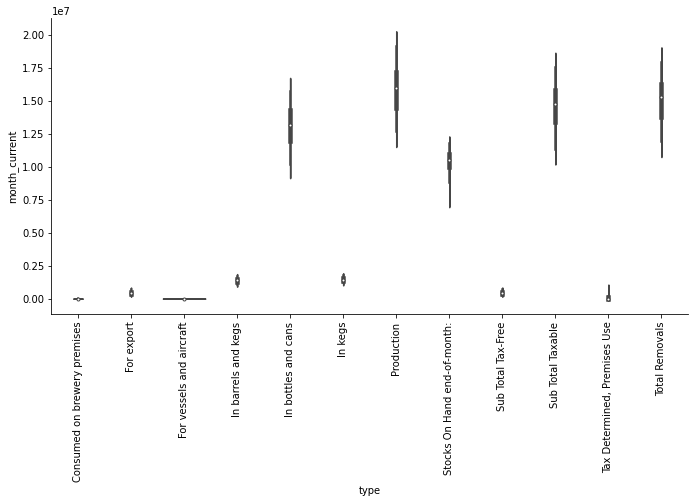

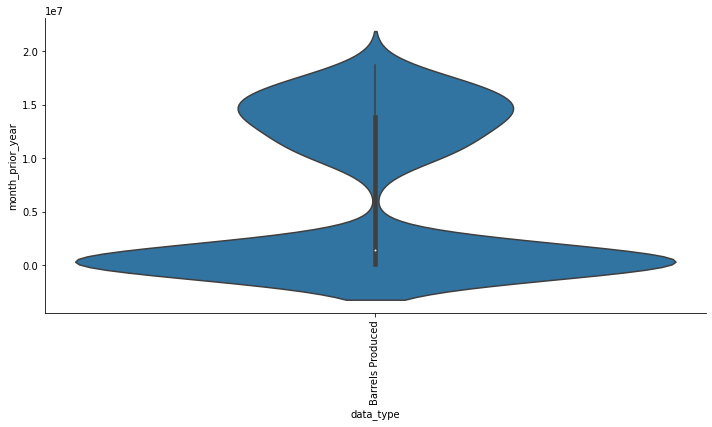

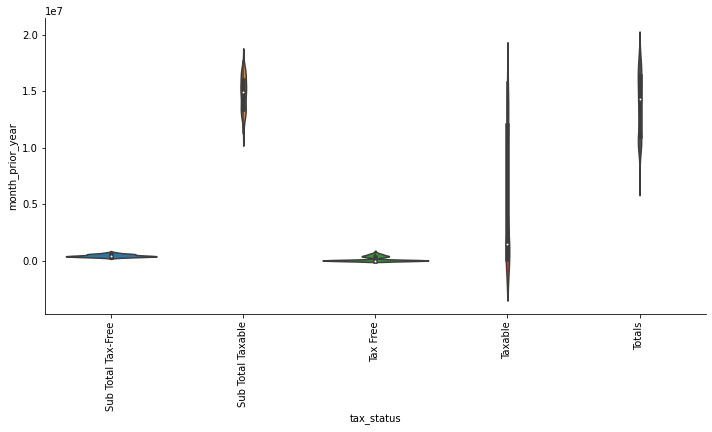

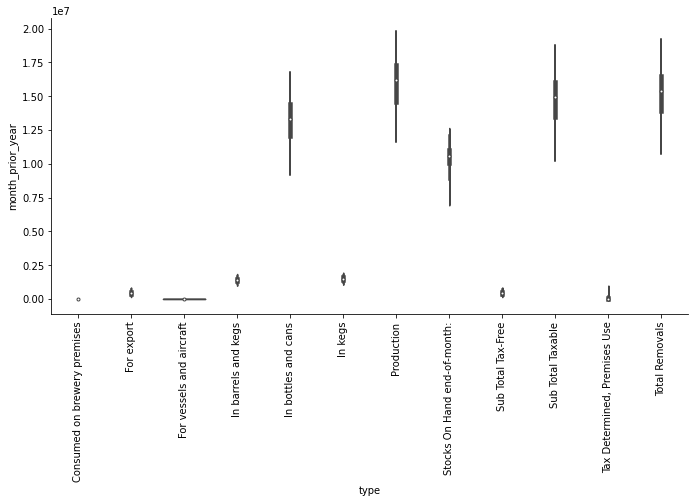

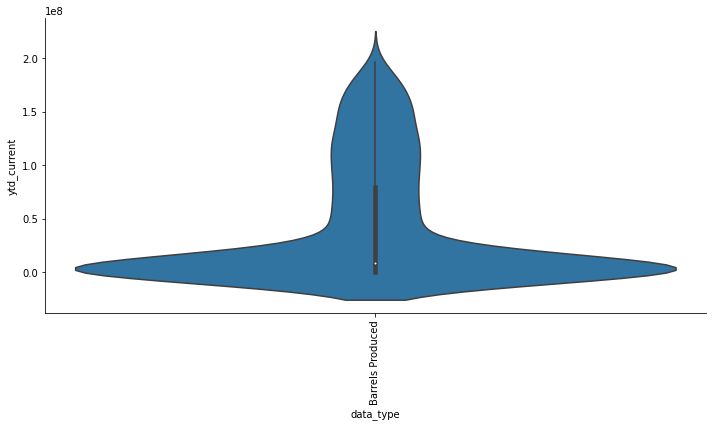

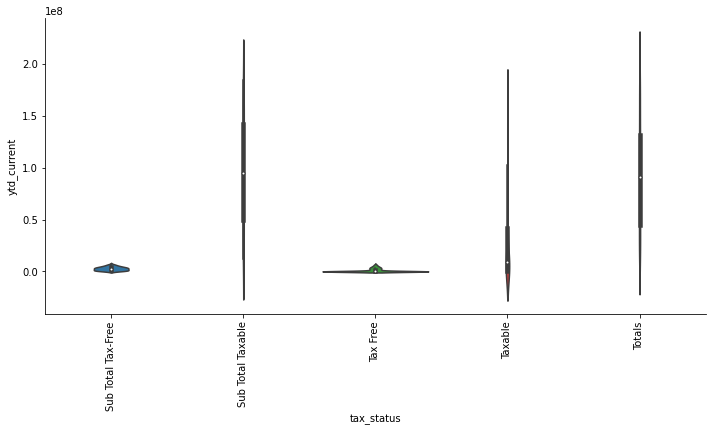

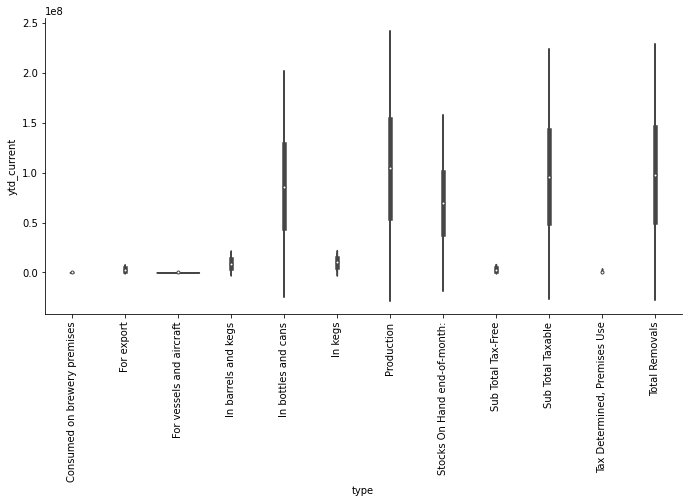

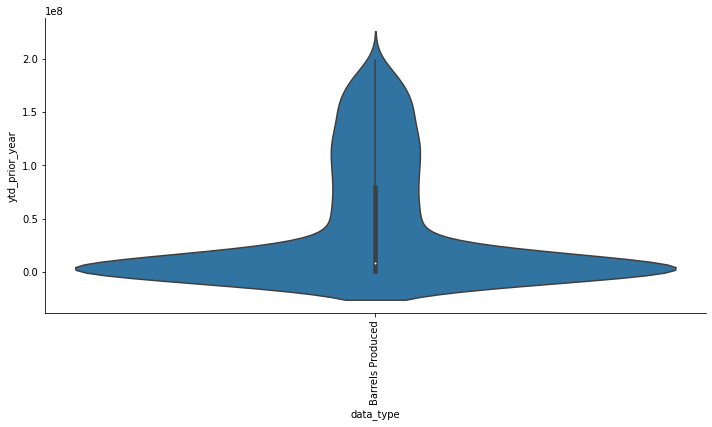

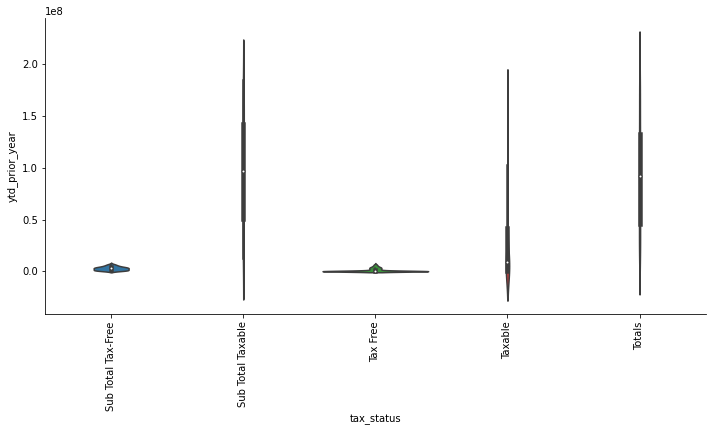

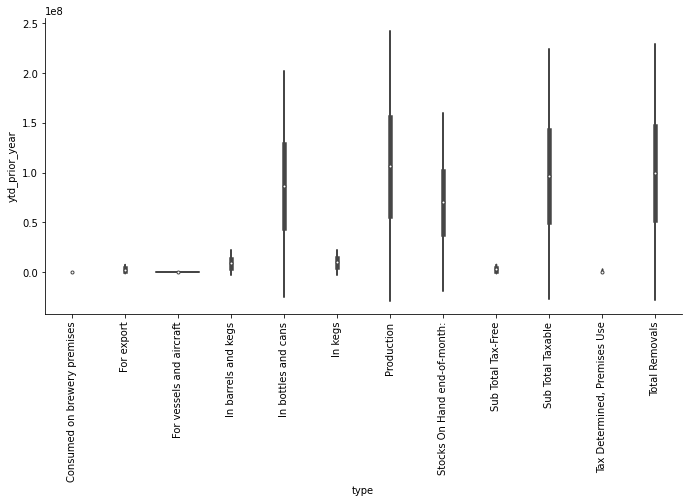

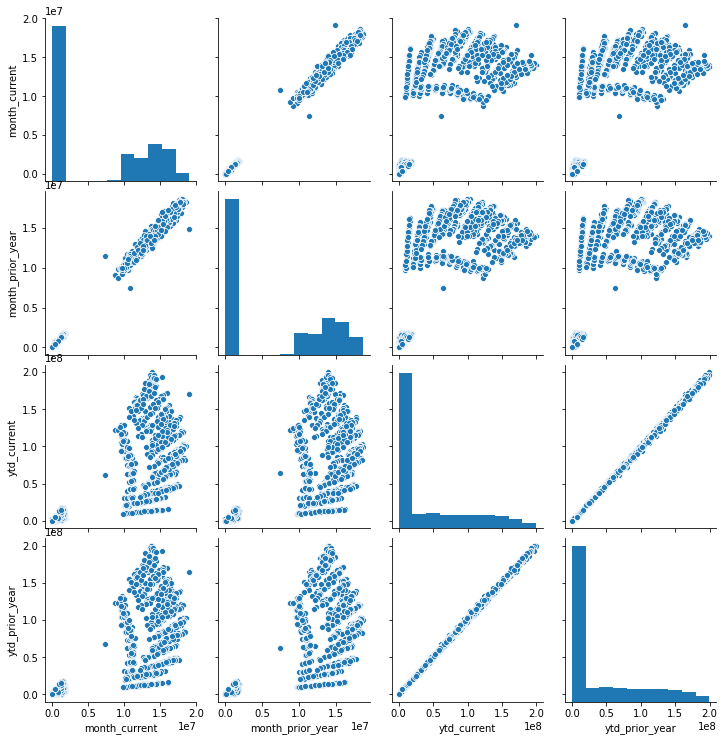

In [26]:
beer_taxed = beer_taxed.drop(columns=["month", "year"])
numeric_eda(beer_taxed)

In [27]:
brewer_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              137 non-null    int64  
 1   brewer_size       137 non-null    object 
 2   n_of_brewers      137 non-null    int64  
 3   total_barrels     136 non-null    float64
 4   taxable_removals  137 non-null    float64
 5   total_shipped     135 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ KB


In [28]:
brewer_size.head()

,year,brewer_size,n_of_brewers,total_barrels,taxable_removals,total_shipped
0,2009,"6,000,001 Barrels and Over",18,1.712329e+08,1.596440e+08,3639970.0
1,2009,"1,000,001 to 6,000,000 Barrels",4,9.970404e+06,9.592723e+06,14548.0
2,2009,"500,001 to 1,000,000 Barrels",7,4.831386e+06,4.535659e+06,21563.0
3,2009,"100,001 to 500,000 Barrels",27,5.422156e+06,4.469289e+06,128000.0
4,2009,"60,001 to 100,000 Barrels",19,1.501977e+06,1.224618e+06,95732.0


In [29]:
# set categorical data
brewer_size['brewer_size'] = brewer_size['brewer_size'].astype('category')

brewer_size    16
dtype: int64
Top 5 unique values of brewer_size
                    brewer_size  Count
0                         Total     11
1       7,501 to 15,000 Barrels     11
2     60,001 to 100,000 Barrels     11
3    6,000,001 Barrels and Over     11
4  500,001 to 1,000,000 Barrels     11
 


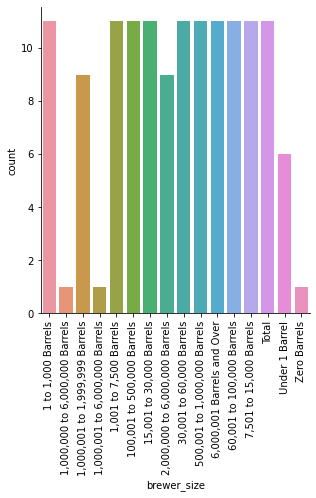

In [30]:
categorical_eda(brewer_size)

,count,mean,std,min,25%,50%,75%,max
year,137.0,2.014175e+03,3.185209e+00,2009.00,2011.000,2014.000,2017.00,2.019000e+03
n_of_brewers,137.0,6.123504e+02,1.313523e+03,3.00,15.000,43.000,428.00,6.400000e+03
total_barrels,136.0,3.079608e+07,6.115894e+07,0.00,1382425.822,3055304.715,10513168.19,1.969693e+08
taxable_removals,137.0,2.824719e+07,5.637782e+07,14711.36,1203851.810,2714928.750,8697815.57,1.829955e+08
total_shipped,135.0,8.852457e+05,1.854341e+06,12.00,6544.500,39494.000,265117.50,6.908958e+06


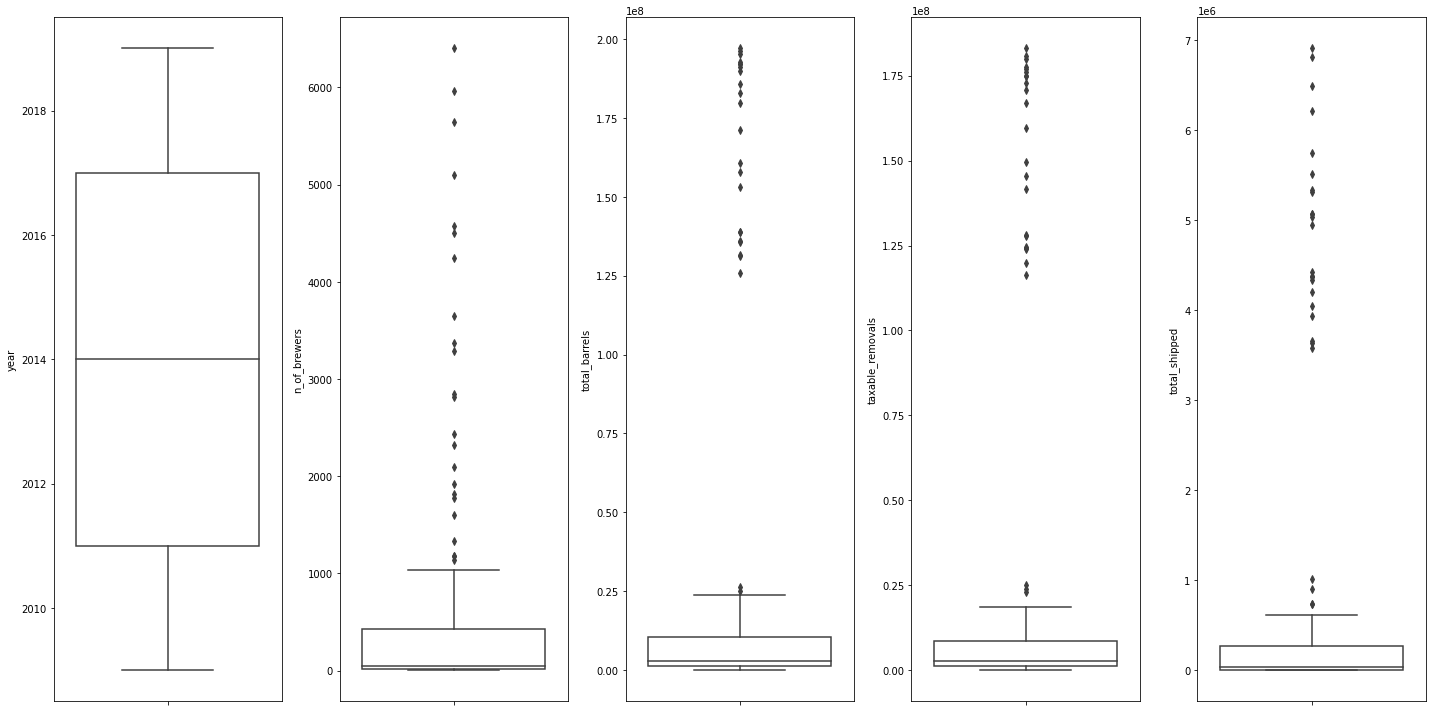

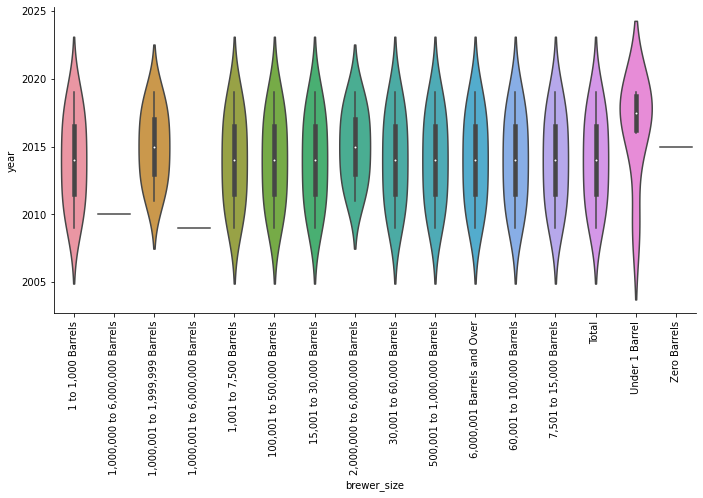

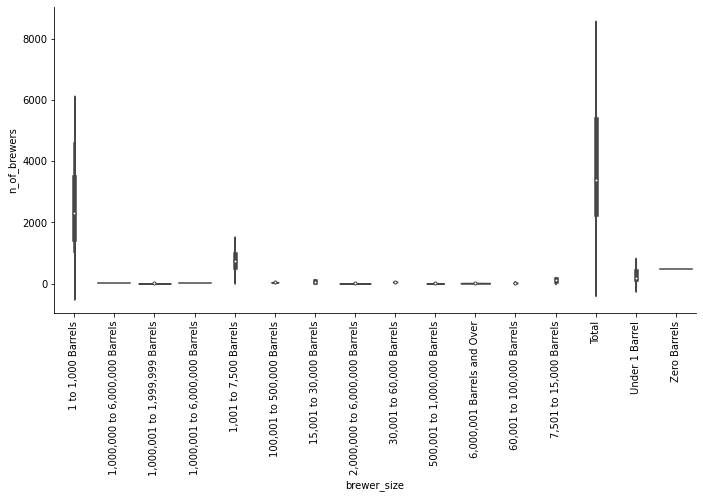

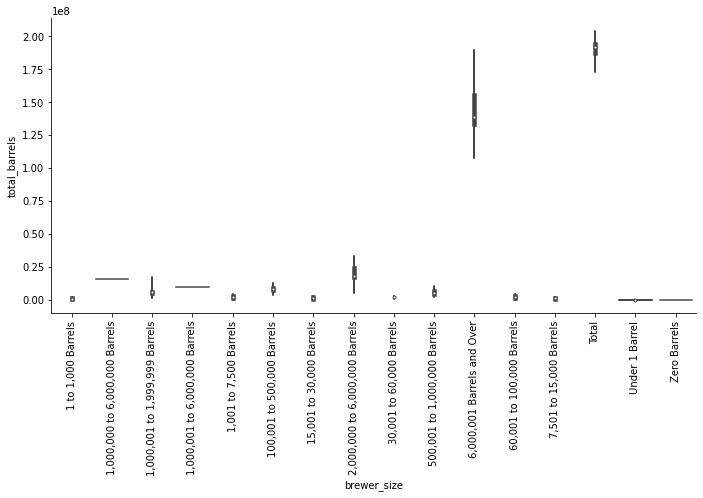

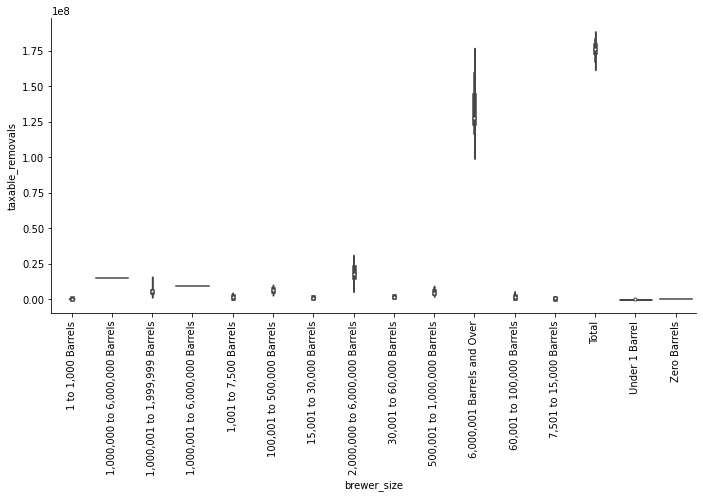

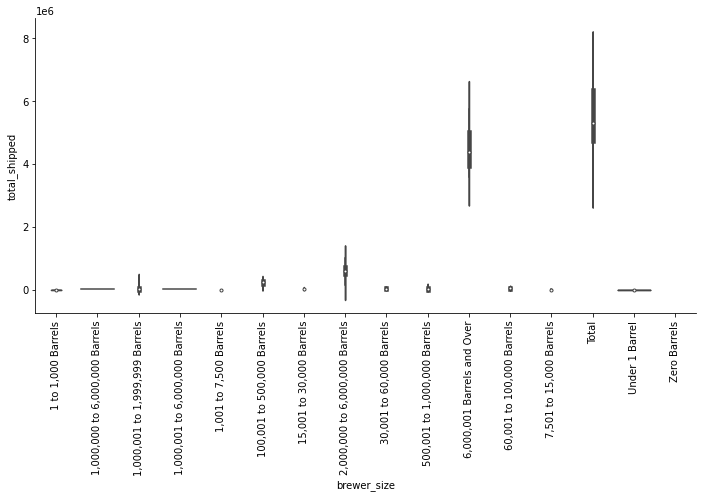

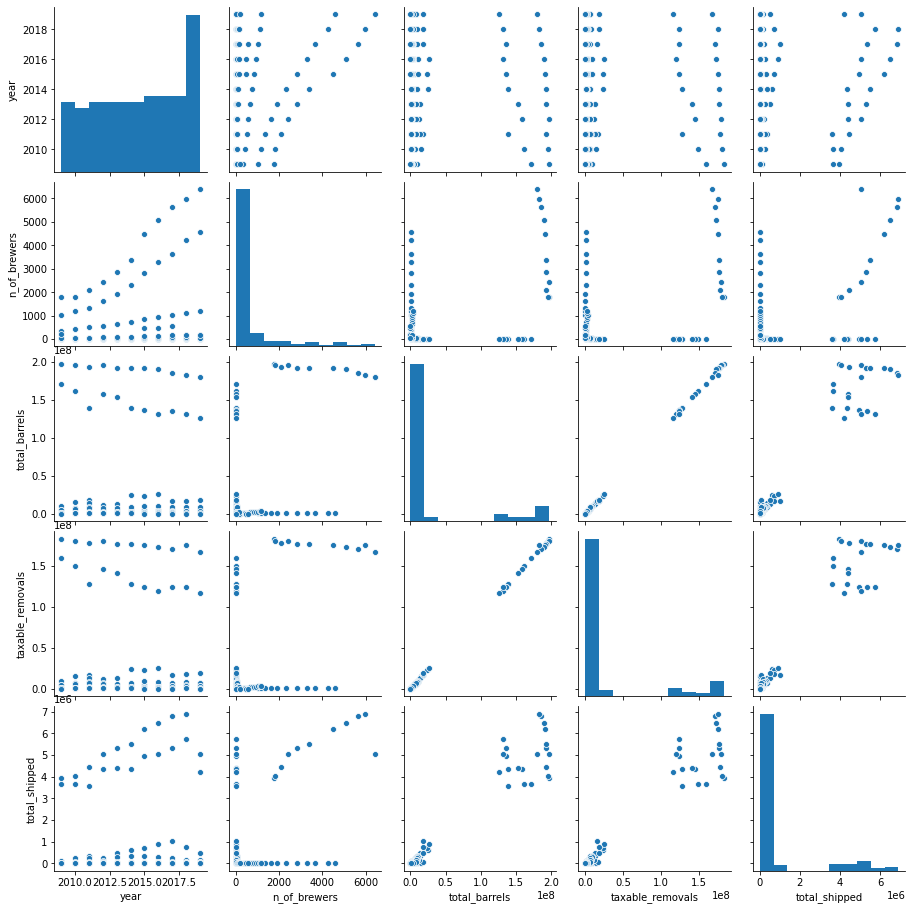

In [31]:
numeric_eda(brewer_size)

In [32]:
beer_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   object 
 1   year     1872 non-null   int64  
 2   barrels  1853 non-null   float64
 3   type     1872 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ KB


In [33]:
beer_states.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


In [34]:
beer_states['type'] = beer_states['type'].astype('category')
beer_states['state'] = beer_states['state'].astype('category')

state    52
type      3
dtype: int64
Top 5 unique values of state
   state  Count
0  total     36
1     WY     36
2     MN     36
3     MI     36
4     ME     36
 
Top 5 unique values of type
               type  Count
0       On Premises    624
1  Kegs and Barrels    624
2  Bottles and Cans    624
 


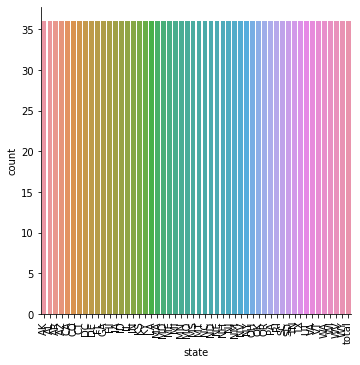

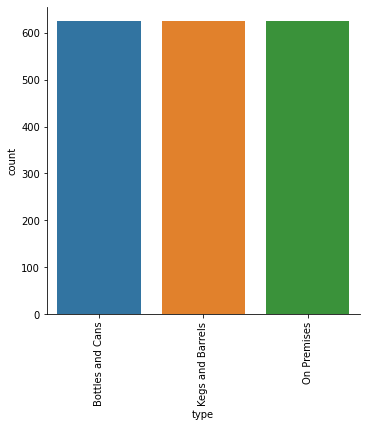

In [35]:
categorical_eda(beer_states)

,count,mean,std,min,25%,50%,75%,max
year,1872.0,2.013500e+03,3.452975e+00,2008.0,2010.75,2013.50,2016.25,2.019000e+03
barrels,1853.0,2.286370e+06,1.313637e+07,0.0,6907.14,30800.78,222188.23,1.669300e+08


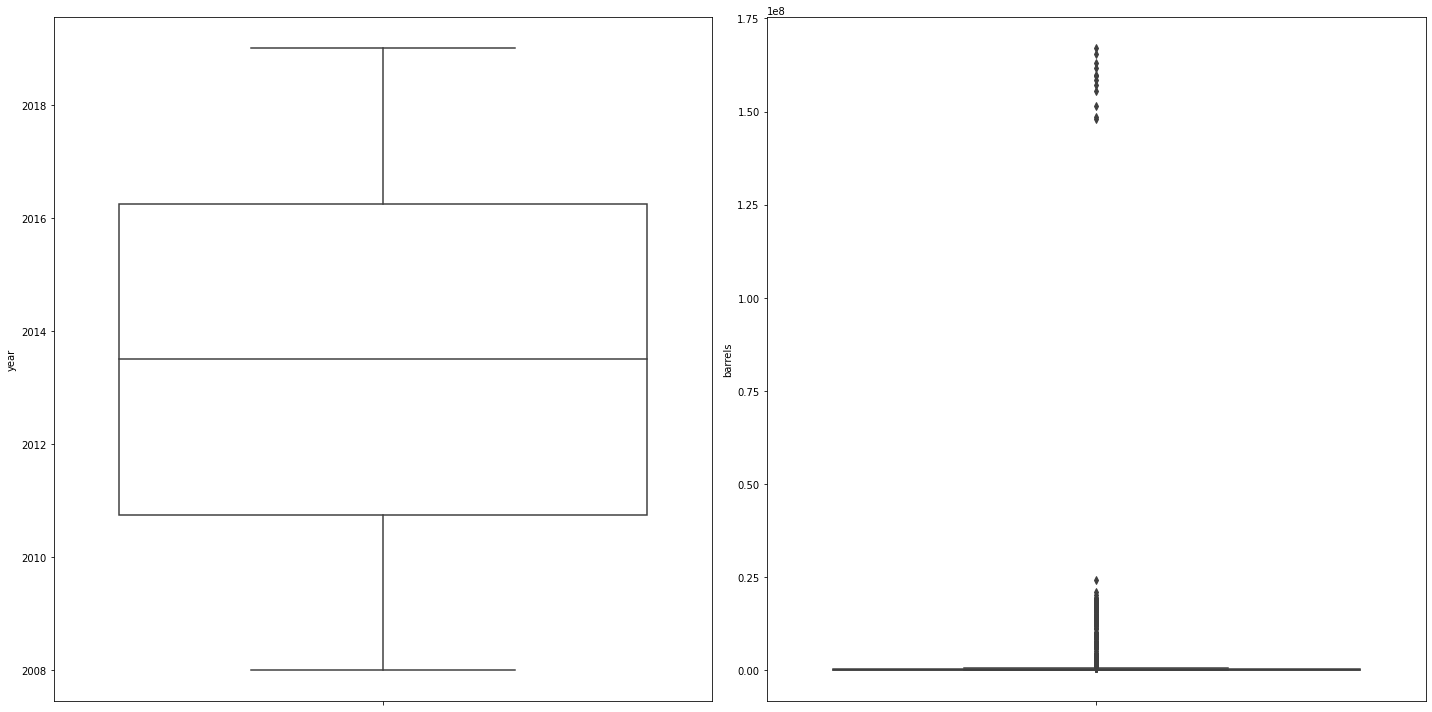

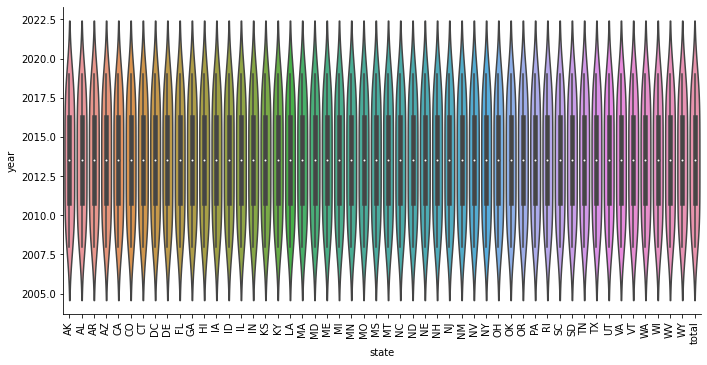

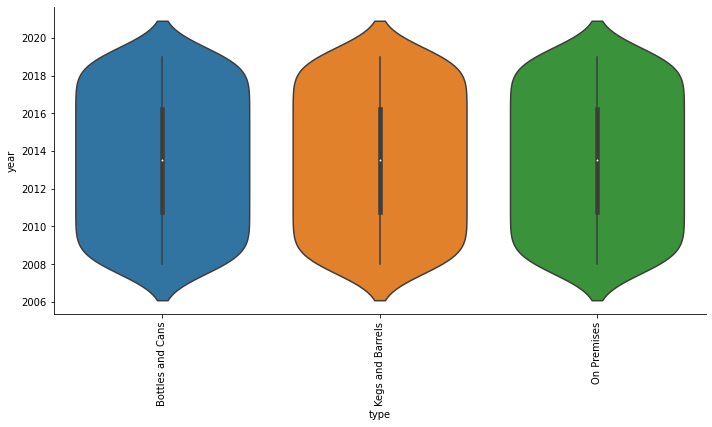

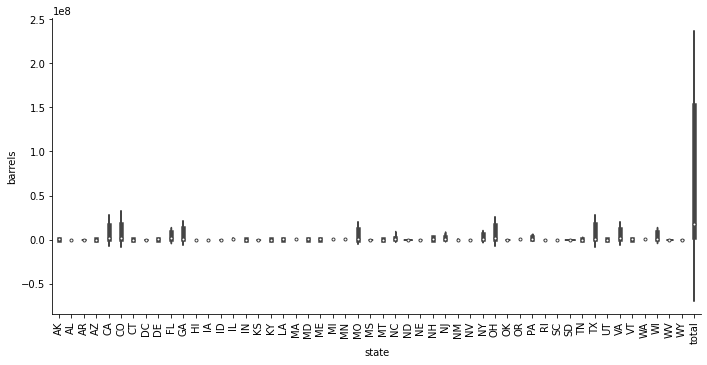

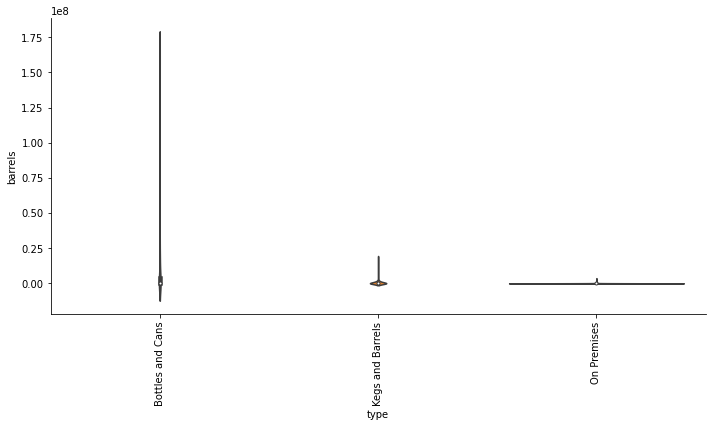

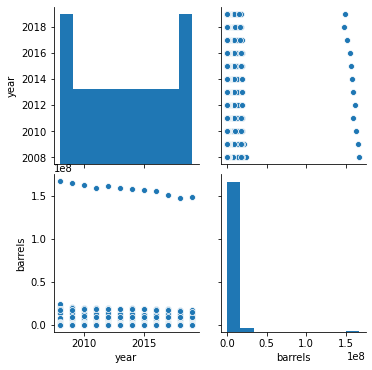

In [36]:
numeric_eda(beer_states)